Detected 1 hand. Landmark table (normalized coords and pixel coords):



,name,x_norm,y_norm,z_norm,x_px,y_px
index,,,,,,
0,WRIST,0.554120,0.954886,6.180887e-07,355,458
1,THUMB_CMC,0.455561,0.915270,-5.279522e-02,292,439
2,THUMB_MCP,0.390134,0.797939,-7.809708e-02,250,383
3,THUMB_IP,0.348054,0.692006,-9.652409e-02,223,332
4,THUMB_TIP,0.299305,0.622776,-1.156247e-01,192,299
5,INDEX_MCP,0.464693,0.639622,-5.886990e-02,297,307
6,INDEX_PIP,0.433893,0.501810,-9.539897e-02,278,241
7,INDEX_DIP,0.413951,0.406848,-1.237113e-01,265,195
8,INDEX_TIP,0.399850,0.326573,-1.454405e-01,256,157



Num landmarks: 21 (should be 21).  Shape: (21, 3)


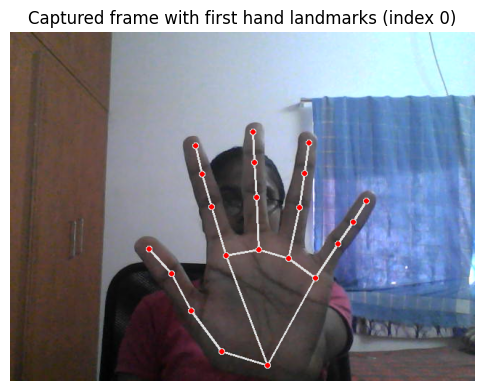

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Setup ---
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

hands = mp_hands.Hands(
    static_image_mode=False,
    model_complexity=1,
    min_detection_confidence=0.75,
    min_tracking_confidence=0.75,
    max_num_hands=2
)

# Friendly mapping of landmark index -> anatomical name
LANDMARK_NAMES = {
    0: "WRIST",
    1: "THUMB_CMC",
    2: "THUMB_MCP",
    3: "THUMB_IP",
    4: "THUMB_TIP",
    5: "INDEX_MCP",
    6: "INDEX_PIP",
    7: "INDEX_DIP",
    8: "INDEX_TIP",
    9: "MIDDLE_MCP",
    10: "MIDDLE_PIP",
    11: "MIDDLE_DIP",
    12: "MIDDLE_TIP",
    13: "RING_MCP",
    14: "RING_PIP",
    15: "RING_DIP",
    16: "RING_TIP",
    17: "PINKY_MCP",
    18: "PINKY_PIP",
    19: "PINKY_DIP",
    20: "PINKY_TIP",
}

# --- Capture one frame from webcam ---
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

if not ret:
    raise RuntimeError("Unable to read from the webcam (device 0). Make sure the camera is connected.")

# Mirror image for a webcam-like view
frame = cv2.flip(frame, 1)
img_h, img_w = frame.shape[:2]

# Convert to RGB for MediaPipe
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# --- Process with MediaPipe Hands ---
results = hands.process(frame_rgb)

if results.multi_hand_landmarks and len(results.multi_hand_landmarks) > 0:
    # We'll take the first detected hand (index 0)
    hand_landmarks = results.multi_hand_landmarks[0]

    # Build a table of landmark values
    rows = []
    for idx, lm in enumerate(hand_landmarks.landmark):
        x_norm = lm.x
        y_norm = lm.y
        z_norm = lm.z
        x_px = int(round(x_norm * img_w))
        y_px = int(round(y_norm * img_h))
        rows.append({
            "index": idx,
            "name": LANDMARK_NAMES.get(idx, f"LM_{idx}"),
            "x_norm": float(x_norm),
            "y_norm": float(y_norm),
            "z_norm": float(z_norm),
            "x_px": int(x_px),
            "y_px": int(y_px)
        })

    df = pd.DataFrame(rows)
    df = df.set_index("index")
    # Print summary information
    print("Detected 1 hand. Landmark table (normalized coords and pixel coords):\n")
    display(df)   # shows a nice table in Jupyter

    # Also print small summary / shapes
    coords_np = np.array([[r["x_norm"], r["y_norm"], r["z_norm"]] for r in rows])
    print(f"\nNum landmarks: {coords_np.shape[0]} (should be 21).  Shape: {coords_np.shape}")

    # Draw landmarks on the image for visualization
    annotated = frame.copy()
    mp_drawing.draw_landmarks(annotated, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Show the annotated image inline
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Captured frame with first hand landmarks (index 0)")
    plt.show()

else:
    print("No hand detected in the captured frame. Try moving your hand in front of the webcam and re-run the cell.")

# Clean up MediaPipe resources
hands.close()


In [1]:
import cv2
import numpy as np
import mediapipe as mp
import pandas as pd
import matplotlib

print("OpenCV (cv2) version:", cv2.__version__)
print("NumPy version:", np.__version__)
print("MediaPipe version:", mp.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)

OpenCV (cv2) version: 4.11.0
NumPy version: 1.26.4
MediaPipe version: 0.10.21
Pandas version: 2.3.3
Matplotlib version: 3.10.7


In [1]:
import cv2
import mediapipe as mp

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=False,
    model_complexity=1,
    min_detection_confidence=0.75,
    min_tracking_confidence=0.75,
    max_num_hands=2
)

cap = cv2.VideoCapture(0)

while True:
    success, img = cap.read()
    if not success:
        print("Failed to grab frame")
        break

    # mirror image for webcam-like view
    img = cv2.flip(img, 1)

    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(imgRGB)

    if results.multi_hand_landmarks:
        # if two hands detected, show 'Both Hands'
        if len(results.multi_handedness) == 2:
            cv2.putText(img, 'Both Hands', (250, 50),
                        cv2.FONT_HERSHEY_COMPLEX, 0.9, (0, 255, 0), 2)
        # otherwise iterate and get label for each detected hand
        # note: the order of multi_hand_landmarks and multi_handedness is linked,
        # so use the same index for both lists.
        for idx, hand_landmarks in enumerate(results.multi_hand_landmarks):
            # get handedness label directly from the proto object
            # classification is a repeated field; [0] holds the top label
            handedness_proto = results.multi_handedness[idx]
            label = handedness_proto.classification[0].label  # 'Left' or 'Right'

            # choose x position based on label (or use bounding box center if you prefer)
            if label == 'Left':
                x_pos = 20
            else:
                x_pos = img.shape[1] - 140  # near right edge

            cv2.putText(img, f'{label} Hand', (x_pos, 50),
                        cv2.FONT_HERSHEY_COMPLEX, 0.9, (0, 255, 0), 2)

            # Optionally draw the landmarks
            mp.solutions.drawing_utils.draw_landmarks(
                img, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    cv2.imshow('Image', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [1]:
import cv2
import mediapipe as mp
import numpy as np
import math

# --- 1. System Volume Setup (Placeholder for OS Control) ---
# NOTE: To control the actual system volume, you need a library like 'pycaw'
# on Windows or 'osascript' on Mac. For simplicity and portability, we will
# use print statements and visual feedback. If you install 'pycaw', this is
# where you would initialize the AudioUtilities and Volume objects.

# Example volume range (adjust based on your system)
volRange = [0, 100]  # Minimum and maximum system volume percentage

# --- 2. MediaPipe Initialization (Hand Gestures) ---
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=False,
    model_complexity=1,
    min_detection_confidence=0.75,
    min_tracking_confidence=0.75,
    max_num_hands=1  # Only track one hand for volume control
)
mp_drawing = mp.solutions.drawing_utils

# Start Video Capture
cap = cv2.VideoCapture(0)

# Define the minimum and maximum distance (in pixels) for volume mapping
# *YOU MAY NEED TO ADJUST THESE VALUES BASED ON YOUR WEBCAM/DISTANCE*
min_hand_distance = 30  # Distance when thumb and index are pinched (Low Volume)
max_hand_distance = 250 # Distance when thumb and index are fully open (High Volume)

while True:
    success, img = cap.read()
    if not success:
        print("Failed to grab frame")
        break

    # Preprocessing (Mirror and Color Convert)
    img = cv2.flip(img, 1)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Process the frame for landmarks (The core CNN detection)
    results = hands.process(imgRGB)
    
    lmList = []
    
    # Check for Hand Landmarks (Step 3: Landmark Detection)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Draw the 21 landmarks on the hand
            mp_drawing.draw_landmarks(
                img, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            
            # --- 3. Distance Calculation (Step 4: Isolating the Gesture Input) ---
            for id, lm in enumerate(hand_landmarks.landmark):
                # Convert normalized coordinates (0 to 1) to pixel coordinates
                h, w, c = img.shape
                cx, cy = int(lm.x * w), int(lm.y * h)
                lmList.append([id, cx, cy])
                
            # Check if we have enough landmarks (i.e., a full hand)
            if len(lmList) != 0:
                # Get the pixel coordinates for Thumb Tip (id 4) and Index Finger Tip (id 8)
                x1, y1 = lmList[4][1], lmList[4][2] # Thumb Tip (id 4)
                x2, y2 = lmList[8][1], lmList[8][2] # Index Finger Tip (id 8)

                # Draw circles at the tips for better visualization
                cv2.circle(img, (x1, y1), 10, (255, 0, 255), cv2.FILLED)
                cv2.circle(img, (x2, y2), 10, (255, 0, 255), cv2.FILLED)
                cv2.line(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

                # Calculate the Euclidean Distance (The formula: d = sqrt((x2-x1)^2 + (y2-y1)^2))
                length = math.hypot(x2 - x1, y2 - y1)
                
                # --- 4. Mapping the Distance to Volume ---
                # Use numpy.interp to linearly map the distance (length) to the volume range (0-100)
                # Input Range: [min_hand_distance, max_hand_distance]
                # Output Range: [max_system_vol (100), min_system_vol (0)] -> Note the reverse mapping!
                vol = np.interp(length, [min_hand_distance, max_hand_distance], [volRange[1], volRange[0]])
                
                # Round the volume for display
                vol_percent = int(vol)

                # --- 5. Front End Feedback ---
                # Display the current volume percentage
                cv2.putText(img, f'Volume: {vol_percent}%', (40, 70), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 3)

    # Display the final image with all markings and text
    cv2.imshow('Image', img)
    
    # Break loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import time

# Setup MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=2,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# Open webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise RuntimeError("Cannot open webcam")

found = False
start_time = time.time()

while time.time() - start_time < 15:  # try for 15 seconds
    ret, frame = cap.read()
    if not ret:
        continue

    frame = cv2.flip(frame, 1)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        # Take first hand detected
        hand_landmarks = results.multi_hand_landmarks[0]

        # Get thumb tip and index tip
        thumb_tip = hand_landmarks.landmark[4]
        index_tip = hand_landmarks.landmark[8]

        h, w, _ = frame.shape
        x1, y1 = int(thumb_tip.x * w), int(thumb_tip.y * h)
        x2, y2 = int(index_tip.x * w), int(index_tip.y * h)

        # Calculate distance
        pixel_dist = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

        # Print console text
        print("✅ Hand detected!")
        print(f"Thumb Tip (LM_4): ({x1}, {y1})")
        print(f"Index Tip (LM_8): ({x2}, {y2})")
        print(f"Distance between Thumb Tip and Index Tip: {pixel_dist:.2f} pixels")

        # Draw landmarks and line
        mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        cv2.circle(frame, (x1, y1), 8, (0, 0, 255), -1)
        cv2.circle(frame, (x2, y2), 8, (255, 0, 0), -1)
        cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        found = True
        break

cap.release()
hands.close()

if not found:
    print("⚠️ No hand detected. Adjust your hand position or lighting.")
else:
    # Show the image after console text
    cv2.imshow("Detected Hand", frame)
    print("\nPress any key on the image window to close.")
    cv2.waitKey(0)
    cv2.destroyAllWindows()


✅ Hand detected!
Thumb Tip (LM_4): (158, 395)
Index Tip (LM_8): (237, 222)
Distance between Thumb Tip and Index Tip: 190.18 pixels

Press any key on the image window to close.


✅ Detected one hand.

📏 Distance between Thumb Tip (LM_4) and Index Tip (LM_8):
   → Normalized distance: 0.3823
   → Pixel distance: 190.08 pixels



,name,x_norm,y_norm,z_norm,x_px,y_px
index,,,,,,
0,WRIST,0.573872,1.091693,0.000001,367,524
1,THUMB_CMC,0.479522,1.062170,-0.061033,306,509
2,THUMB_MCP,0.400445,0.974757,-0.095761,256,467
3,THUMB_IP,0.338786,0.893241,-0.122486,216,428
4,THUMB_TIP,0.284408,0.815942,-0.150495,182,391
5,INDEX_MCP,0.467812,0.806247,-0.090810,299,386
6,INDEX_PIP,0.442468,0.652387,-0.137982,283,313
7,INDEX_DIP,0.425944,0.546807,-0.169234,272,262
8,INDEX_TIP,0.414680,0.458841,-0.191609,265,220


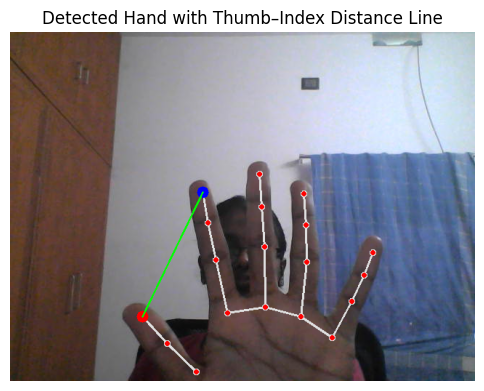

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Setup MediaPipe Hands ---
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=2,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# Landmark names
LANDMARK_NAMES = {
    0: "WRIST", 1: "THUMB_CMC", 2: "THUMB_MCP", 3: "THUMB_IP", 4: "THUMB_TIP",
    5: "INDEX_MCP", 6: "INDEX_PIP", 7: "INDEX_DIP", 8: "INDEX_TIP",
    9: "MIDDLE_MCP", 10: "MIDDLE_PIP", 11: "MIDDLE_DIP", 12: "MIDDLE_TIP",
    13: "RING_MCP", 14: "RING_PIP", 15: "RING_DIP", 16: "RING_TIP",
    17: "PINKY_MCP", 18: "PINKY_PIP", 19: "PINKY_DIP", 20: "PINKY_TIP"
}

# --- Capture one frame ---
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

if not ret:
    raise RuntimeError("Unable to read from the webcam. Check camera connection.")

frame = cv2.flip(frame, 1)  # mirror
img_h, img_w = frame.shape[:2]
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# --- Process the frame ---
results = hands.process(frame_rgb)

if results.multi_hand_landmarks:
    hand_landmarks = results.multi_hand_landmarks[0]

    # --- Build landmark table ---
    rows = []
    for idx, lm in enumerate(hand_landmarks.landmark):
        x_px, y_px = int(lm.x * img_w), int(lm.y * img_h)
        rows.append({
            "index": idx,
            "name": LANDMARK_NAMES.get(idx, f"LM_{idx}"),
            "x_norm": lm.x,
            "y_norm": lm.y,
            "z_norm": lm.z,
            "x_px": x_px,
            "y_px": y_px
        })
    df = pd.DataFrame(rows).set_index("index")

    # --- Calculate Thumb–Index Tip Distance ---
    thumb = df.loc[4]
    index = df.loc[8]

    norm_dist = np.sqrt(
        (thumb["x_norm"] - index["x_norm"])**2 +
        (thumb["y_norm"] - index["y_norm"])**2 +
        (thumb["z_norm"] - index["z_norm"])**2
    )
    pixel_dist = np.sqrt((thumb["x_px"] - index["x_px"])**2 +
                         (thumb["y_px"] - index["y_px"])**2)

    # --- Step 1: Print Hand Detected + Distances ---
    print("✅ Detected one hand.\n")
    print("📏 Distance between Thumb Tip (LM_4) and Index Tip (LM_8):")
    print(f"   → Normalized distance: {norm_dist:.4f}")
    print(f"   → Pixel distance: {pixel_dist:.2f} pixels\n")

    # --- Step 2: Display Landmark Table ---
    display(df)

    # --- Step 3: Annotate Image ---
    annotated = frame.copy()
    mp_drawing.draw_landmarks(annotated, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Highlight Thumb Tip and Index Tip
    cv2.circle(annotated, (thumb["x_px"], thumb["y_px"]), 8, (0, 0, 255), -1)
    cv2.circle(annotated, (index["x_px"], index["y_px"]), 8, (255, 0, 0), -1)
    cv2.line(annotated, (thumb["x_px"], thumb["y_px"]),
             (index["x_px"], index["y_px"]), (0, 255, 0), 2)

    # Display image below table
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Detected Hand with Thumb–Index Distance Line")
    plt.show()

else:
    print("⚠️ No hand detected. Try showing your hand clearly to the webcam.")

# Clean up
hands.close()


✅ Detected one hand.

📏 Distance between Thumb Tip (LM_4) and Index Tip (LM_8):
   → Normalized distance: 0.2991
   → Pixel distance: 148.25 pixels



,name,x_norm,y_norm,z_norm,x_px,y_px
index,,,,,,
0,WRIST,0.522796,0.984778,5.183938e-07,334,472
1,THUMB_CMC,0.439653,0.936127,-3.573577e-02,281,449
2,THUMB_MCP,0.378545,0.831818,-5.123486e-02,242,399
3,THUMB_IP,0.330168,0.747781,-6.419992e-02,211,358
4,THUMB_TIP,0.282088,0.691129,-7.691474e-02,180,331
5,INDEX_MCP,0.436254,0.676321,-2.636856e-02,279,324
6,INDEX_PIP,0.406892,0.553711,-5.194459e-02,260,265
7,INDEX_DIP,0.386923,0.475478,-7.388296e-02,247,228
8,INDEX_TIP,0.373789,0.406797,-9.112826e-02,239,195


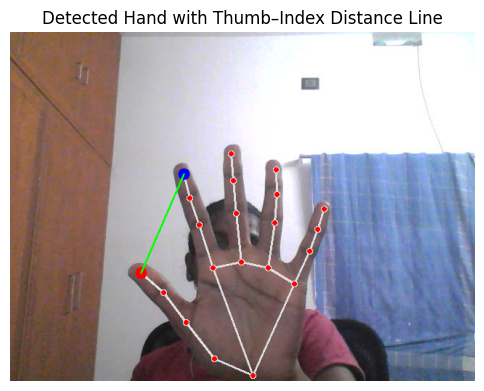

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Setup MediaPipe Hands ---
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=2,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# Landmark names
LANDMARK_NAMES = {
    0: "WRIST", 1: "THUMB_CMC", 2: "THUMB_MCP", 3: "THUMB_IP", 4: "THUMB_TIP",
    5: "INDEX_MCP", 6: "INDEX_PIP", 7: "INDEX_DIP", 8: "INDEX_TIP",
    9: "MIDDLE_MCP", 10: "MIDDLE_PIP", 11: "MIDDLE_DIP", 12: "MIDDLE_TIP",
    13: "RING_MCP", 14: "RING_PIP", 15: "RING_DIP", 16: "RING_TIP",
    17: "PINKY_MCP", 18: "PINKY_PIP", 19: "PINKY_DIP", 20: "PINKY_TIP"
}

# --- Capture one frame ---
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

if not ret:
    raise RuntimeError("Unable to read from the webcam. Check camera connection.")

frame = cv2.flip(frame, 1)  # mirror
img_h, img_w = frame.shape[:2]
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# --- Process the frame ---
results = hands.process(frame_rgb)

if results.multi_hand_landmarks:
    hand_landmarks = results.multi_hand_landmarks[0]

    # --- Build landmark table ---
    rows = []
    for idx, lm in enumerate(hand_landmarks.landmark):
        x_px, y_px = int(lm.x * img_w), int(lm.y * img_h)
        rows.append({
            "index": idx,
            "name": LANDMARK_NAMES.get(idx, f"LM_{idx}"),
            "x_norm": lm.x,
            "y_norm": lm.y,
            "z_norm": lm.z,
            "x_px": x_px,
            "y_px": y_px
        })
    df = pd.DataFrame(rows).set_index("index")

    # --- Calculate Thumb–Index Tip Distance ---
    thumb = df.loc[4]
    index = df.loc[8]

    norm_dist = np.sqrt(
        (thumb["x_norm"] - index["x_norm"])**2 +
        (thumb["y_norm"] - index["y_norm"])**2 +
        (thumb["z_norm"] - index["z_norm"])**2
    )
    pixel_dist = np.sqrt((thumb["x_px"] - index["x_px"])**2 +
                         (thumb["y_px"] - index["y_px"])**2)

    # --- Step 1: Print Hand Detected + Distances ---
    print("✅ Detected one hand.\n")
    print("📏 Distance between Thumb Tip (LM_4) and Index Tip (LM_8):")
    print(f"   → Normalized distance: {norm_dist:.4f}")
    print(f"   → Pixel distance: {pixel_dist:.2f} pixels\n")

    # --- Step 2: Display Landmark Table ---
    display(df)

    # --- Step 3: Annotate Image ---
    annotated = frame.copy()
    mp_drawing.draw_landmarks(annotated, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Highlight Thumb Tip and Index Tip
    cv2.circle(annotated, (thumb["x_px"], thumb["y_px"]), 8, (0, 0, 255), -1)
    cv2.circle(annotated, (index["x_px"], index["y_px"]), 8, (255, 0, 0), -1)
    cv2.line(annotated, (thumb["x_px"], thumb["y_px"]),
             (index["x_px"], index["y_px"]), (0, 255, 0), 2)

    # Display image below table
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Detected Hand with Thumb–Index Distance Line")
    plt.show()

else:
    print("⚠️ No hand detected. Try showing your hand clearly to the webcam.")

# Clean up
hands.close()


In [1]:
import time
import math
import cv2
import mediapipe as mp
import numpy as np

# --- Configuration ---
CAM_INDEX = 0                # webcam device index
PRINT_EVERY_N_FRAMES = 10    # console print frequency (reduce if you don't want too many prints)
PINCH_PIXEL_THRESHOLD = 40   # pixel threshold to consider "pinch" (tune for your camera/resolution)
PINCH_NORM_THRESHOLD = 0.03  # normalized distance threshold for pinch (tune if needed)

# --- Initialize MediaPipe Hands ---
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    static_image_mode=False,
    model_complexity=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
    max_num_hands=2
)

cap = cv2.VideoCapture(CAM_INDEX)
if not cap.isOpened():
    raise RuntimeError(f"Cannot open camera index {CAM_INDEX}")

frame_count = 0
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to read frame from camera. Exiting.")
            break

        # Mirror frame for a natural webcam view
        frame = cv2.flip(frame, 1)
        img_h, img_w = frame.shape[:2]

        # Convert to RGB and process
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(frame_rgb)

        # Default display values
        pixel_dist = None
        norm_dist = None
        pinch = False
        handedness_label = None

        if results.multi_hand_landmarks and len(results.multi_hand_landmarks) > 0:
            # Use the first detected hand (index 0)
            hand_landmarks = results.multi_hand_landmarks[0]

            # Get landmark 4 (thumb tip) and 8 (index tip)
            lm_thumb = hand_landmarks.landmark[4]
            lm_index = hand_landmarks.landmark[8]

            # Normalized euclidean distance (3D)
            dx_n = lm_thumb.x - lm_index.x
            dy_n = lm_thumb.y - lm_index.y
            dz_n = lm_thumb.z - lm_index.z
            norm_dist = math.sqrt(dx_n*dx_n + dy_n*dy_n + dz_n*dz_n)

            # Pixel distance (2D) using image size
            tx_px = int(round(lm_thumb.x * img_w))
            ty_px = int(round(lm_thumb.y * img_h))
            ix_px = int(round(lm_index.x * img_w))
            iy_px = int(round(lm_index.y * img_h))
            pixel_dist = math.hypot(tx_px - ix_px, ty_px - iy_px)

            # Determine pinch by simple threshold (either pixel or normalized)
            if pixel_dist <= PINCH_PIXEL_THRESHOLD or norm_dist <= PINCH_NORM_THRESHOLD:
                pinch = True

            # Draw landmarks and the connecting line
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Highlight thumb tip and index tip
            cv2.circle(frame, (tx_px, ty_px), 8, (0, 0, 255), -1)   # thumb: red
            cv2.circle(frame, (ix_px, iy_px), 8, (255, 0, 0), -1)   # index: blue
            cv2.line(frame, (tx_px, ty_px), (ix_px, iy_px), (0, 255, 0), 2)  # connecting line

            # If handedness is available, show label for the first hand
            if results.multi_handedness and len(results.multi_handedness) > 0:
                try:
                    handedness_label = results.multi_handedness[0].classification[0].label
                except Exception:
                    handedness_label = None

        # Overlay text on the frame
        y0 = 30
        dy = 28
        overlay_texts = []
        if handedness_label:
            overlay_texts.append(f"Hand: {handedness_label}")
        if norm_dist is not None:
            overlay_texts.append(f"Norm dist: {norm_dist:.4f}")
        if pixel_dist is not None:
            overlay_texts.append(f"Pixel dist: {pixel_dist:.1f}px")
        overlay_texts.append(f"Pinch: {'YES' if pinch else 'no'} (th={PINCH_PIXEL_THRESHOLD}px)")

        for i, t in enumerate(overlay_texts):
            cv2.putText(frame, t, (10, y0 + i*dy),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        cv2.imshow("Hand Distance (press 'q' to quit)", frame)

        # Print to console every N frames
        if frame_count % PRINT_EVERY_N_FRAMES == 0:
            ts = time.strftime("%H:%M:%S")
            if norm_dist is None:
                print(f"[{ts}] No hand detected")
            else:
                print(f"[{ts}] Norm dist={norm_dist:.4f}  Pixel dist={pixel_dist:.1f}px  Pinch={'YES' if pinch else 'no'}")

        frame_count += 1

        # Exit on 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

finally:
    cap.release()
    cv2.destroyAllWindows()
    hands.close()
    print("Clean exit.")


[18:01:29] Norm dist=0.4360  Pixel dist=206.0px  Pinch=no
[18:01:29] Norm dist=0.4573  Pixel dist=226.4px  Pinch=no
[18:01:30] Norm dist=0.4522  Pixel dist=224.2px  Pinch=no
[18:01:31] Norm dist=0.4679  Pixel dist=231.4px  Pinch=no
[18:01:32] Norm dist=0.4542  Pixel dist=223.7px  Pinch=no
[18:01:33] Norm dist=0.4493  Pixel dist=218.9px  Pinch=no
[18:01:34] Norm dist=0.4538  Pixel dist=221.1px  Pinch=no
[18:01:35] Norm dist=0.4482  Pixel dist=219.5px  Pinch=no
[18:01:35] Norm dist=0.4472  Pixel dist=218.5px  Pinch=no
[18:01:36] Norm dist=0.4508  Pixel dist=221.0px  Pinch=no
[18:01:37] Norm dist=0.4626  Pixel dist=226.1px  Pinch=no
[18:01:38] Norm dist=0.4678  Pixel dist=228.4px  Pinch=no
[18:01:39] Norm dist=0.4616  Pixel dist=224.9px  Pinch=no
[18:01:40] Norm dist=0.4720  Pixel dist=230.2px  Pinch=no
[18:01:40] Norm dist=0.4622  Pixel dist=225.1px  Pinch=no
[18:01:41] Norm dist=0.4472  Pixel dist=218.0px  Pinch=no
[18:01:42] Norm dist=0.4676  Pixel dist=227.3px  Pinch=no
[18:01:43] Nor

In [1]:
import time
import math
import cv2
import mediapipe as mp
import numpy as np

# --- Configuration ---
CAM_INDEX = 0                # webcam device index
PRINT_EVERY_N_FRAMES = 10    # console print frequency (reduce if you don't want too many prints)
PINCH_PIXEL_THRESHOLD = 40   # pixel threshold to consider "pinch" (tune for your camera/resolution)
PINCH_NORM_THRESHOLD = 0.03  # normalized distance threshold for pinch (tune if needed)

# --- Initialize MediaPipe Hands ---
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    static_image_mode=False,
    model_complexity=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
    max_num_hands=2
)

cap = cv2.VideoCapture(CAM_INDEX)
if not cap.isOpened():
    raise RuntimeError(f"Cannot open camera index {CAM_INDEX}")

frame_count = 0
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to read frame from camera. Exiting.")
            break

        # Mirror frame for a natural webcam view
        frame = cv2.flip(frame, 1)
        img_h, img_w = frame.shape[:2]

        # Convert to RGB and process
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(frame_rgb)

        # Default display values
        pixel_dist = None
        norm_dist = None
        pinch = False
        handedness_label = None

        if results.multi_hand_landmarks and len(results.multi_hand_landmarks) > 0:
            # Use the first detected hand (index 0)
            hand_landmarks = results.multi_hand_landmarks[0]

            # Get landmark 4 (thumb tip) and 8 (index tip)
            lm_thumb = hand_landmarks.landmark[4]
            lm_index = hand_landmarks.landmark[8]

            # Normalized euclidean distance (3D)
            dx_n = lm_thumb.x - lm_index.x
            dy_n = lm_thumb.y - lm_index.y
            dz_n = lm_thumb.z - lm_index.z
            norm_dist = math.sqrt(dx_n*dx_n + dy_n*dy_n + dz_n*dz_n)

            # Pixel distance (2D) using image size
            tx_px = int(round(lm_thumb.x * img_w))
            ty_px = int(round(lm_thumb.y * img_h))
            ix_px = int(round(lm_index.x * img_w))
            iy_px = int(round(lm_index.y * img_h))
            pixel_dist = math.hypot(tx_px - ix_px, ty_px - iy_px)

            # Determine pinch by simple threshold (either pixel or normalized)
            if pixel_dist <= PINCH_PIXEL_THRESHOLD or norm_dist <= PINCH_NORM_THRESHOLD:
                pinch = True

            # Draw landmarks and the connecting line
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Highlight thumb tip and index tip
            cv2.circle(frame, (tx_px, ty_px), 8, (0, 0, 255), -1)   # thumb: red
            cv2.circle(frame, (ix_px, iy_px), 8, (255, 0, 0), -1)   # index: blue
            cv2.line(frame, (tx_px, ty_px), (ix_px, iy_px), (0, 255, 0), 2)  # connecting line

            # If handedness is available, show label for the first hand
            if results.multi_handedness and len(results.multi_handedness) > 0:
                try:
                    handedness_label = results.multi_handedness[0].classification[0].label
                except Exception:
                    handedness_label = None

        # Overlay text on the frame
        y0 = 30
        dy = 28
        overlay_texts = []
        if handedness_label:
            overlay_texts.append(f"Hand: {handedness_label}")
        if norm_dist is not None:
            overlay_texts.append(f"Norm dist: {norm_dist:.4f}")
        if pixel_dist is not None:
            overlay_texts.append(f"Pixel dist: {pixel_dist:.1f}px")
        overlay_texts.append(f"Pinch: {'YES' if pinch else 'no'} (th={PINCH_PIXEL_THRESHOLD}px)")

        for i, t in enumerate(overlay_texts):
            cv2.putText(frame, t, (10, y0 + i*dy),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        cv2.imshow("Hand Distance (press 'q' to quit)", frame)

        # Print to console every N frames
        if frame_count % PRINT_EVERY_N_FRAMES == 0:
            ts = time.strftime("%H:%M:%S")
            if norm_dist is None:
                print(f"[{ts}] No hand detected")
            else:
                print(f"[{ts}] Norm dist={norm_dist:.4f}  Pixel dist={pixel_dist:.1f}px  Pinch={'YES' if pinch else 'no'}")

        frame_count += 1

        # Exit on 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

finally:
    cap.release()
    cv2.destroyAllWindows()
    hands.close()
    print("Clean exit.")


[18:02:40] Norm dist=0.4360  Pixel dist=213.3px  Pinch=no
[18:02:41] Norm dist=0.4149  Pixel dist=206.0px  Pinch=no
[18:02:42] Norm dist=0.4209  Pixel dist=209.3px  Pinch=no
[18:02:43] Norm dist=0.4208  Pixel dist=207.3px  Pinch=no
[18:02:43] Norm dist=0.4166  Pixel dist=205.4px  Pinch=no
[18:02:44] Norm dist=0.4054  Pixel dist=200.6px  Pinch=no
[18:02:45] Norm dist=0.4106  Pixel dist=202.6px  Pinch=no
[18:02:46] Norm dist=0.4215  Pixel dist=207.6px  Pinch=no
[18:02:47] Norm dist=0.4192  Pixel dist=205.9px  Pinch=no
[18:02:47] Norm dist=0.4253  Pixel dist=209.7px  Pinch=no
[18:02:48] Norm dist=0.4256  Pixel dist=208.4px  Pinch=no
[18:02:49] Norm dist=0.4146  Pixel dist=203.1px  Pinch=no
[18:02:50] Norm dist=0.4148  Pixel dist=201.1px  Pinch=no
[18:02:51] Norm dist=0.4187  Pixel dist=203.7px  Pinch=no
[18:02:52] Norm dist=0.4182  Pixel dist=203.5px  Pinch=no
[18:02:52] Norm dist=0.4251  Pixel dist=206.5px  Pinch=no
[18:02:53] Norm dist=0.4165  Pixel dist=202.0px  Pinch=no
[18:02:54] Nor

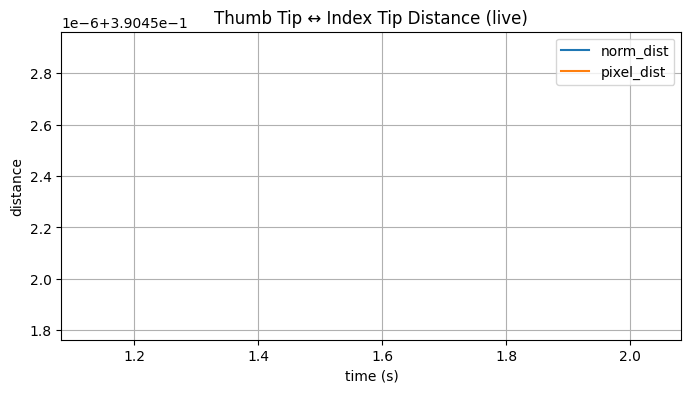

[18:10:11] norm=0.3905  pix=195.0px  pinch=no
[18:10:13] norm=0.3764  pix=185.9px  pinch=no
[18:10:16] norm=0.3689  pix=181.2px  pinch=no
[18:10:19] norm=0.3734  pix=181.7px  pinch=no
[18:10:22] norm=0.3791  pix=184.3px  pinch=no
[18:10:25] norm=0.3855  pix=186.9px  pinch=no
Clean exit.


In [1]:
"""
hand_distance_live_plot.py

Real-time hand landmark distance + live plot.

Requirements:
    pip install mediapipe opencv-python matplotlib numpy
"""

import time
import math
from collections import deque
import csv
import os

import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Configuration ----------------
CAM_INDEX = 0
MAX_PTS = 200                 # number of points shown on the live plot (rolling window)
PRINT_EVERY_N_FRAMES = 15     # console print frequency
PINCH_PIXEL_THRESHOLD = 40
PINCH_NORM_THRESHOLD = 0.03

LOG_TO_CSV = True             # toggle CSV logging
CSV_FILENAME = "hand_distance_log.csv"
# ------------------------------------------------

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    static_image_mode=False,
    model_complexity=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
    max_num_hands=2
)

# Initialize webcam
cap = cv2.VideoCapture(CAM_INDEX)
if not cap.isOpened():
    raise RuntimeError(f"Cannot open camera index {CAM_INDEX}")

# Prepare data structures for live plotting
timestamps = deque(maxlen=MAX_PTS)
norm_dists = deque(maxlen=MAX_PTS)
pixel_dists = deque(maxlen=MAX_PTS)

# Prepare matplotlib figure
plt.ion()
fig, ax = plt.subplots(figsize=(8, 4))
line_norm, = ax.plot([], [], label="norm_dist")   # do not set colors explicitly
line_pix, = ax.plot([], [], label="pixel_dist")
ax.set_xlabel("time (s)")
ax.set_ylabel("distance")
ax.set_title("Thumb Tip ↔ Index Tip Distance (live)")
ax.legend(loc="upper right")
ax.grid(True)

start_time = time.time()
frame_count = 0

# Prepare CSV log
if LOG_TO_CSV:
    first_write = not os.path.exists(CSV_FILENAME)
    csv_file = open(CSV_FILENAME, "a", newline="")
    csv_writer = csv.writer(csv_file)
    if first_write:
        csv_writer.writerow(["timestamp_iso", "elapsed_s", "norm_dist", "pixel_dist", "pinch"])

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to read frame from camera. Exiting.")
            break

        frame = cv2.flip(frame, 1)
        img_h, img_w = frame.shape[:2]
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(frame_rgb)

        norm_dist = None
        pixel_dist = None
        pinch = False
        handedness_label = None

        if results.multi_hand_landmarks and len(results.multi_hand_landmarks) > 0:
            # use first detected hand (index 0)
            hand_landmarks = results.multi_hand_landmarks[0]
            lm_thumb = hand_landmarks.landmark[4]
            lm_index = hand_landmarks.landmark[8]

            dx_n = lm_thumb.x - lm_index.x
            dy_n = lm_thumb.y - lm_index.y
            dz_n = lm_thumb.z - lm_index.z
            norm_dist = math.sqrt(dx_n*dx_n + dy_n*dy_n + dz_n*dz_n)

            tx_px = int(round(lm_thumb.x * img_w))
            ty_px = int(round(lm_thumb.y * img_h))
            ix_px = int(round(lm_index.x * img_w))
            iy_px = int(round(lm_index.y * img_h))
            pixel_dist = math.hypot(tx_px - ix_px, ty_px - iy_px)

            if pixel_dist <= PINCH_PIXEL_THRESHOLD or (norm_dist is not None and norm_dist <= PINCH_NORM_THRESHOLD):
                pinch = True

            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            cv2.circle(frame, (tx_px, ty_px), 8, (0, 0, 255), -1)
            cv2.circle(frame, (ix_px, iy_px), 8, (255, 0, 0), -1)
            cv2.line(frame, (tx_px, ty_px), (ix_px, iy_px), (0, 255, 0), 2)

            if results.multi_handedness and len(results.multi_handedness) > 0:
                try:
                    handedness_label = results.multi_handedness[0].classification[0].label
                except Exception:
                    handedness_label = None

        # overlay text
        base_y = 25
        dy_text = 26
        lines = []
        if handedness_label:
            lines.append(f"Hand: {handedness_label}")
        if norm_dist is not None:
            lines.append(f"Norm: {norm_dist:.4f}")
        if pixel_dist is not None:
            lines.append(f"Pixel: {pixel_dist:.1f}px")
        lines.append(f"Pinch: {'YES' if pinch else 'no'}")

        for i, txt in enumerate(lines):
            cv2.putText(frame, txt, (10, base_y + i*dy_text), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)

        cv2.imshow("Hand Distance (press 'q' to quit)", frame)

        # update data buffers
        elapsed = time.time() - start_time
        timestamps.append(elapsed)
        norm_dists.append(norm_dist if norm_dist is not None else np.nan)
        pixel_dists.append(pixel_dist if pixel_dist is not None else np.nan)

        # update plot lines (convert deques to arrays)
        t_arr = np.array(timestamps)
        norm_arr = np.array(norm_dists)
        pix_arr = np.array(pixel_dists)

        # keep x axis relative to current time window
        if len(t_arr) > 0:
            xmin = t_arr[0]
            xmax = t_arr[-1]
            ax.set_xlim(xmin, xmax if xmax > xmin else xmin + 1)

        # scale pixel distances to overlay with normalized values on same axis for visibility:
        # compute scale factor only when we have values
        if np.nanmax(pix_arr) > 0 and np.nanmax(norm_arr) > 0:
            # map pixel max to ~ (norm max * factor)
            # choose factor so both series are visible; if pixel magnitudes are large, downscale them
            # simple heuristic:
            factor = (np.nanmax(norm_arr) + 1e-6) / (np.nanmax(pix_arr) + 1e-6)
        else:
            factor = 1.0

        scaled_pix = pix_arr * factor

        # update plotted data
        line_norm.set_data(t_arr, norm_arr)
        line_pix.set_data(t_arr, scaled_pix)

        # recompute y-limits to fit data
        y_vals = np.concatenate([np.nan_to_num(norm_arr, nan=0.0), np.nan_to_num(scaled_pix, nan=0.0)])
        if y_vals.size > 0:
            y_min, y_max = np.min(y_vals), np.max(y_vals)
            padding = (y_max - y_min) * 0.1 if (y_max - y_min) > 0 else 0.1
            ax.set_ylim(y_min - padding, y_max + padding)

        ax.relim()
        ax.autoscale_view()  # ensure view updated
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.pause(0.001)  # keep UI responsive

        # optional CSV logging
        if LOG_TO_CSV:
            iso_ts = time.strftime("%Y-%m-%dT%H:%M:%S", time.localtime())
            csv_writer.writerow([
                iso_ts,
                f"{elapsed:.3f}",
                f"{(norm_dist if norm_dist is not None else '')}",
                f"{(pixel_dist if pixel_dist is not None else '')}",
                "1" if pinch else "0"
            ])
            # flush file occasionally
            if frame_count % 50 == 0:
                csv_file.flush()

        # occasional console print
        if frame_count % PRINT_EVERY_N_FRAMES == 0:
            now = time.strftime("%H:%M:%S")
            if norm_dist is None:
                print(f"[{now}] no hand")
            else:
                print(f"[{now}] norm={norm_dist:.4f}  pix={pixel_dist:.1f}px  pinch={'YES' if pinch else 'no'}")

        frame_count += 1

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

finally:
    cap.release()
    cv2.destroyAllWindows()
    hands.close()
    if LOG_TO_CSV:
        csv_file.close()
    print("Clean exit.")
